#               Lecture 12                  #
                                          
##  Auxiliary file to clean data            
    - can practice, but not mandatory   
                                          
#### Case Study:                               
- life-expectancy and income               
---

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

Call the data from github

In [2]:
my_url = "https://raw.githubusercontent.com/gabors-data-analysis/da-coding-rstats/main/lecture14-simple-regression/data/raw/WDI_lifeexp_raw.csv"
df = pd.read_csv(my_url)
df.loc[lambda x: x["country"] == "Namibia","iso2c"] = "NA"

Check the observations:

Lot of grouping observations usually contains a number

In [3]:
d1 = df.loc[~df["iso2c"].str.isalpha()]
d1

,iso2c,country,year,NY.GDP.PCAP.PP.KD,SP.DYN.LE00.IN,SP.POP.TOTL
0,1A,Arab World,2019,14211.415054,71.989709,4.278703e+08
1,1W,World,2019,16867.057302,72.741689,7.673345e+09
2,4E,East Asia & Pacific (excluding high income),2019,14406.088879,75.402506,2.093675e+09
3,7E,Europe & Central Asia (excluding high income),2019,22081.859317,73.935400,4.187609e+08
4,8S,South Asia,2019,6237.444175,69.643617,1.835777e+09
18,B8,Central Europe and the Baltics,2019,32579.985417,77.144103,1.023985e+08
66,F1,Fragile and conflict affected situations,2019,4395.965514,62.480088,9.087395e+08
177,S1,Small states,2019,20576.575973,69.770847,4.125453e+07
178,S2,Pacific island small states,2019,7326.364774,70.079731,2.491878e+06
179,S3,Caribbean small states,2019,15852.195755,73.754732,7.401389e+06


Filter these out

In [4]:
df = df.loc[df["iso2c"].str.isalpha()]

 Some grouping observations are still there, check each of them\
   HK - Hong Kong, China\
   OE - OECD members\
   all with starting X, except XK which is Kosovo\
   all with starting Z, except ZA-South Africa, ZM-Zambia and ZW-Zimbabwe\

1st drop speficif values

In [5]:
df.loc[lambda x: x["iso2c"].isin(["EU","HK","OE"])]

,iso2c,country,year,NY.GDP.PCAP.PP.KD,SP.DYN.LE00.IN,SP.POP.TOTL
65,EU,European Union,2019,44333.258870,81.063847,4.471965e+08
87,HK,"Hong Kong SAR, China",2019,59586.204007,85.078049,7.507400e+06
158,OE,OECD members,2019,44546.008819,80.205090,1.364842e+09


Save opposite

In [6]:
df = df.loc[lambda x: ~x["iso2c"].isin(["EU","HK","OE"])]

2nd drop values with certain starting character\
Get the first letter from iso2c

In [7]:
df = df.loc[
    (~((df["iso2c"].str[0] == "X") | (df["iso2c"].str[0] == "Z")))
    | (df["iso2c"].isin(["XK", "ZA", "ZM", "ZW"]))
]

Check for missing observations

In [8]:
df = df.dropna(subset=["NY.GDP.PCAP.PP.KD", "SP.DYN.LE00.IN", "SP.POP.TOTL"])

### Clean variables

Rename variables and scale them\
Drop all the others !! in this case write into readme it is referring to year 2018!!

In [9]:
df["population"] = df["SP.POP.TOTL"] / 10**6
df["gdppc"] = df["NY.GDP.PCAP.PP.KD"] / 10**3
df["lifeexp"] = df["SP.DYN.LE00.IN"]

df = df.filter(["country", "population", "gdppc", "lifeexp"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002097A316A58>,
      dtype=object)

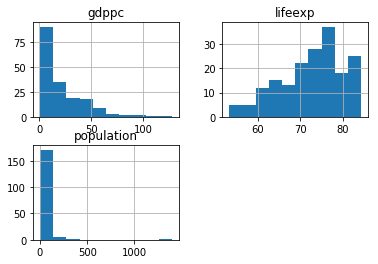

In [10]:
df.filter([ "population", "gdppc", "lifeexp"]).hist()

It seems we have a large value(s) for population:

In [11]:
df.loc[df["population"]>500]

,country,population,gdppc,lifeexp
45,China,1397.715000,16.092301,76.912
96,India,1366.417756,6.717178,69.656


These are India and China... not an extreme value

In [12]:
df.describe()

,population,gdppc,lifeexp
count,180.000000,180.000000,180.000000
mean,41.657096,21.438360,72.726386
std,150.361578,22.555867,7.377117
min,0.063913,0.751664,53.283000
25%,2.270922,5.122250,67.773250
50%,8.828019,13.367983,74.067000
75%,30.769718,31.004150,77.873500
max,1397.715000,127.903180,84.356341


Save the raw data file for your working directory

In [13]:
df.to_csv("WDI_lifeexp_clean.csv",index=False)